In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored
import math  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [2]:
survey_path = r"E:\MOOCs\My Projects\PredictINC\Datasets\Train data-BH713-90.csv"
survey = pd.read_csv(survey_path, skiprows = [0, 2])
#survey = survey.drop(["Unnamed: 26"], axis = 1)
survey.head()

,Station,Dip,Azimuth,GHS,GTF,DLS,Easting,Northing,Elevation,UpDown,...,Roll to station,Roll to station (rev),Time to station,Temperature,Battery,Station acc.,Station rate,Station Quality,Max. rate,Motion Quality
0,0,-72.4043,90.0000,91.4285,91.4285,0.0000,620852.8820,4631519.595,1359.5580,0.0000,...,-10.4439,-0.0290,28.0166,14.2615,7.7960,0.0020,0.0005,100,0.6257,100.0000
1,3,-72.0146,89.9921,101.8784,101.8724,3.8974,620853.7986,4631519.595,1356.7015,0.0102,...,26.4207,0.0734,28.1887,14.2145,7.7996,0.0012,0.0010,100,0.4222,99.9425
2,6,-71.6686,90.8500,74.7977,75.4517,4.3724,620854.7335,4631519.588,1353.8509,0.0396,...,2.7055,0.0075,28.1395,14.1697,7.8019,0.0010,0.0004,100,0.2062,100.0000
3,9,-71.2351,91.8174,71.1548,72.7462,5.3164,620855.6875,4631519.566,1351.0067,0.0894,...,-3.5105,-0.0098,28.4426,14.1250,7.8031,0.0010,0.0009,100,0.1495,100.0000
4,12,-70.9930,93.0357,73.6145,76.2567,4.6271,620856.6576,4631519.525,1348.1683,0.1565,...,0.5446,0.0015,28.0003,14.0805,7.8061,0.0010,0.0004,100,0.1916,100.0000


In [4]:
#Collar Coordinates
collar_easting = survey["Easting"].iloc[0]
collar_northing = survey["Northing"].iloc[0]
collar_elevation = survey["Elevation"].iloc[0]

#Collar Parameters
collar_dip = -72
collar_azimuth = 90

In [5]:
# Calculating Target Coordinates
target_easting = ((survey["Station"]
                   ) / 2 * ((np.sin(np.radians(collar_dip + 90)) * np.sin(np.radians(collar_azimuth))
                            ) + (np.sin(np.radians(collar_dip + 90)) * np.sin(np.radians(collar_azimuth))))
                  ) + collar_easting
target_northing = ((survey["Station"]
                    ) / 2 * ((np.sin(np.radians(collar_dip + 90)) * np.cos(np.radians(collar_azimuth))
                             ) + (np.sin(np.radians(collar_dip + 90)) * np.cos(np.radians(collar_azimuth))))
                   ) + collar_northing

target_elevation = (-1 * (survey["Station"]
                          ) / 2 * (np.cos(np.radians(collar_dip + 90)) + np.cos(np.radians(collar_dip + 90)))
                    ) + collar_elevation

In [6]:
#Actual Coordinates
actual_easting = survey["Easting"]
actual_northing = survey["Northing"]
actual_elevation = survey["Elevation"]

In [7]:
# Target Differences
targ_east_differ = abs(target_easting - actual_easting)
targ_nort_differ = abs(target_northing - actual_northing)
targ_elev_differ = abs(target_elevation - actual_elevation)

In [8]:
tot_misc_to_targ = np.sqrt(targ_east_differ ** 2 + targ_nort_differ ** 2 + targ_elev_differ ** 2)

In [9]:
survey["Deviation"] = tot_misc_to_targ

In [10]:
survey.head()

,Station,Dip,Azimuth,GHS,GTF,DLS,Easting,Northing,Elevation,UpDown,...,Roll to station (rev),Time to station,Temperature,Battery,Station acc.,Station rate,Station Quality,Max. rate,Motion Quality,Deviation
0,0,-72.4043,90.0000,91.4285,91.4285,0.0000,620852.8820,4631519.595,1359.5580,0.0000,...,-0.0290,28.0166,14.2615,7.7960,0.0020,0.0005,100,0.6257,100.0000,0.000000
1,3,-72.0146,89.9921,101.8784,101.8724,3.8974,620853.7986,4631519.595,1356.7015,0.0102,...,0.0734,28.1887,14.2145,7.7996,0.0012,0.0010,100,0.4222,99.9425,0.010969
2,6,-71.6686,90.8500,74.7977,75.4517,4.3724,620854.7335,4631519.588,1353.8509,0.0396,...,0.0075,28.1395,14.1697,7.8019,0.0010,0.0004,100,0.2062,100.0000,0.007507
3,9,-71.2351,91.8174,71.1548,72.7462,5.3164,620855.6875,4631519.566,1351.0067,0.0894,...,-0.0098,28.4426,14.1250,7.8031,0.0010,0.0009,100,0.1495,100.0000,0.038745
4,12,-70.9930,93.0357,73.6145,76.2567,4.6271,620856.6576,4631519.525,1348.1683,0.1565,...,0.0015,28.0003,14.0805,7.8061,0.0010,0.0004,100,0.1916,100.0000,0.099851


In [11]:
#survey.to_csv("survey3.csv")

In [12]:
#survey.columns

In [13]:
#survey_features = ["Dip", "Azimuth", "GHS", "GTF", "DLS", "Easting", "Northing", "Elevation", "UpDown", "LeftRight"]

In [14]:
X = survey.Station.values.reshape((-1,1))

In [15]:
X

array([[ 0],
       [ 3],
       [ 6],
       [ 9],
       [12],
       [15],
       [18],
       [21],
       [24],
       [27],
       [30],
       [33],
       [36],
       [39],
       [42],
       [45],
       [48],
       [51]], dtype=int64)

In [16]:
y = survey["Deviation"].values

In [17]:
y

array([0.        , 0.01096882, 0.00750661, 0.03874482, 0.09985103,
       0.18750737, 0.29893696, 0.41999365, 0.53712492, 0.64637259,
       0.75205561, 0.85864579, 0.97081751, 1.08767557, 1.21010953,
       1.33213289, 1.4505472 , 1.56076357])

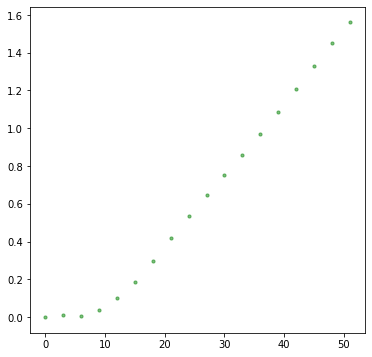

In [18]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.scatter(survey["Station"], survey["Deviation"],
             marker = "o",
             s = 10,
             color = "green",
             alpha = 0.5,
             label = "Planned")

In [65]:
g=150.2
predict = np.array([g]).reshape(-1,1)

In [66]:
predict

array([[150.2]])

In [67]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
r_sq = regressor.score(X, y)
r_sq

0.9773018345382143

In [69]:
y_pred = regressor.predict(predict)

In [75]:
y_pred[0]

4.777119002429248

TypeError: type numpy.ndarray doesn't define __round__ method

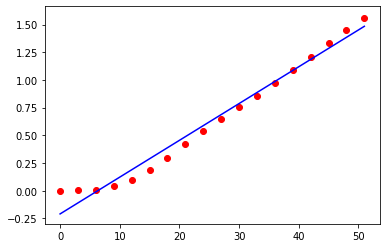

In [24]:
plt.scatter(X,y, color = 'red')
plt.plot(X,regressor.predict(X) , color='blue')

## Polynomial Regression

In [25]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
transformer.fit(X)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [27]:
X_ = transformer.transform(X)

In [28]:
X_

array([[   0.,    0.],
       [   3.,    9.],
       [   6.,   36.],
       [   9.,   81.],
       [  12.,  144.],
       [  15.,  225.],
       [  18.,  324.],
       [  21.,  441.],
       [  24.,  576.],
       [  27.,  729.],
       [  30.,  900.],
       [  33., 1089.],
       [  36., 1296.],
       [  39., 1521.],
       [  42., 1764.],
       [  45., 2025.],
       [  48., 2304.],
       [  51., 2601.]])

In [29]:
poly_model = LinearRegression().fit(X_, y)

In [30]:
poly_r_sq = poly_model.score(X_, y)

In [31]:
poly_r_sq

0.9938821623351559

In [32]:
poly_predict = np.array([102, 102**2]).reshape(1,2)

In [33]:
poly_predict

array([[  102, 10404]])

In [34]:
ploy_y_pred = poly_model.predict(poly_predict)

In [35]:
ploy_y_pred

array([4.92765813])

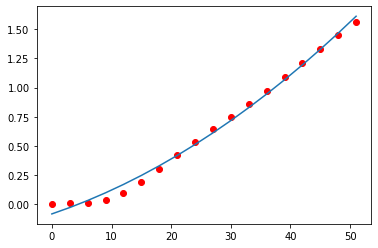

In [42]:
plt.scatter(X,y, color = 'red')
plt.plot(X_[:,0],poly_model.predict(X_))

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y , test_size = 0.2, random_state=0)

In [43]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
#y_train=y_train.reshape(-1,1)
#y_test=y_test.reshape(-1,1)

In [22]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 1.45975827 -1.01743359  4.92782687  3.04516106 -0.42290754  2.94607338
  2.74789803  0.07253083  6.61231733  4.0360378   1.75702129  6.41414198
  0.9643199   5.91870361  2.05428431  6.21596663  4.33330082]


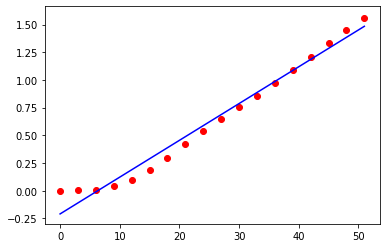

In [277]:
survey.iloc[27]

IndexError: single positional indexer is out-of-bounds